# Clean and Updated Data / EDA
***
## Import packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
train = pd.read_csv('../data/train.csv')

In [4]:
test = pd.read_csv('../data/test.csv')

In [5]:
pop = pd.read_csv('../data/population_by_country_2020.csv')

In [6]:
pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3480,3.05%,103,0,12170,NaN,N.A.,N.A.,66%,0.00%
232,Niue,1626,0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,Tokelau,1357,1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [14]:
train

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0
...,...,...,...,...,...,...,...,...
17035,26375,NaN,Zambia,-15.4167,28.2833,2020-03-17,0.0,0.0
17036,26376,NaN,Zambia,-15.4167,28.2833,2020-03-18,2.0,0.0
17037,26377,NaN,Zambia,-15.4167,28.2833,2020-03-19,2.0,0.0
17038,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0


In [11]:
train['Country/Region'].value_counts()

US                       3480
China                    1980
Canada                    660
Australia                 540
France                    480
                         ... 
Republic of the Congo      60
Ecuador                    60
Cuba                       60
Bulgaria                   60
Equatorial Guinea          60
Name: Country/Region, Length: 163, dtype: int64

In [16]:
train_join = pd.concat([train, pop], axis=1, join='outer')

In [17]:
train_join

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,China,1.439324e+09,0.39%,5540090.0,153.0,9388211.0,-348399.0,1.7,38,61%,18.47%
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,India,1.380004e+09,0.99%,13586631.0,464.0,2973190.0,-532687.0,2.2,28,35%,17.70%
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,United States,3.310027e+08,0.59%,1937734.0,36.0,9147420.0,954806.0,1.8,38,83%,4.25%
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,Indonesia,2.735236e+08,1.07%,2898047.0,151.0,1811570.0,-98955.0,2.3,30,56%,3.51%
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,Pakistan,2.208923e+08,2.00%,4327022.0,287.0,770880.0,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,26375,NaN,Zambia,-15.4167,28.2833,2020-03-17,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17036,26376,NaN,Zambia,-15.4167,28.2833,2020-03-18,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17037,26377,NaN,Zambia,-15.4167,28.2833,2020-03-19,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
train_af = train_join.dropna(subset=['Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'])

In [43]:
train_af.head(50)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,China,1.439324e+09,0.39%,5540090.0,153.0,9388211.0,-348399.0,1.7,38,61%,18.47%
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,India,1.380004e+09,0.99%,13586631.0,464.0,2973190.0,-532687.0,2.2,28,35%,17.70%
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,United States,3.310027e+08,0.59%,1937734.0,36.0,9147420.0,954806.0,1.8,38,83%,4.25%
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,Indonesia,2.735236e+08,1.07%,2898047.0,151.0,1811570.0,-98955.0,2.3,30,56%,3.51%
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,Pakistan,2.208923e+08,2.00%,4327022.0,287.0,770880.0,-233379.0,3.6,23,35%,2.83%
5,6,NaN,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,Brazil,2.125594e+08,0.72%,1509890.0,25.0,8358140.0,21200.0,1.7,33,88%,2.73%
6,7,NaN,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0,Nigeria,2.061396e+08,2.58%,5175990.0,226.0,910770.0,-60000.0,5.4,18,52%,2.64%
7,8,NaN,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0,Bangladesh,1.646894e+08,1.01%,1643222.0,1265.0,130170.0,-369501.0,2.1,28,39%,2.11%
8,9,NaN,Afghanistan,33.0,65.0,2020-01-30,0.0,0.0,Russia,1.459345e+08,0.04%,62206.0,9.0,16376870.0,182456.0,1.8,40,74%,1.87%
9,10,NaN,Afghanistan,33.0,65.0,2020-01-31,0.0,0.0,Mexico,1.289328e+08,1.06%,1357224.0,66.0,1943950.0,-60000.0,2.1,29,84%,1.65%


In [42]:
train_af.isnull().sum()

Id                           0
Province/State             201
Country/Region               0
Lat                          0
Long                         0
Date                         0
ConfirmedCases               0
Fatalities                   0
Country (or dependency)      0
Population (2020)            0
Yearly Change                0
Net Change                   0
Density (P/Km²)              0
Land Area (Km²)              0
Migrants (net)               0
Fert. Rate                   0
Med. Age                     0
Urban Pop %                  0
World Share                  0
dtype: int64

In [37]:
train_af.dtypes

Id                           int64
Province/State              object
Country/Region              object
Lat                        float64
Long                       float64
Date                        object
ConfirmedCases             float64
Fatalities                 float64
Country (or dependency)     object
Population (2020)          float64
Yearly Change               object
Net Change                 float64
Density (P/Km²)            float64
Land Area (Km²)            float64
Migrants (net)             float64
Fert. Rate                  object
Med. Age                    object
Urban Pop %                 object
World Share                 object
dtype: object

In [44]:
# train_af['Urban Pop %'] = (train_af['Urban Pop %'].str.strip('%').astype(float))

In [26]:
train_af.to_csv('../data/train_all_features.csv')

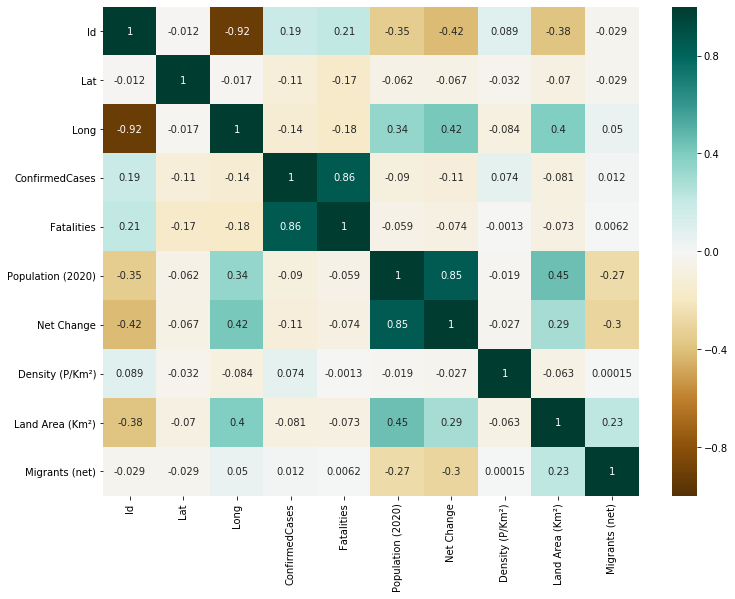

In [28]:
# plot a correlations heat map
train_af_corr = train_af.corr()
plt.figure(figsize = (12,9))
sns.heatmap(train_af_corr,
           vmin =-1,
           vmax = 1,
           cmap='BrBG',
            annot=True)

In [32]:
features = ['Country/Region', 'Lat', 'Long', 'Date', 
            'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 
            'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 
            'Urban Pop %', 'World Share']

In [33]:
X = train_af[features]
y = train_af['ConfirmedCases']

In [34]:
X.shape

(201, 15)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [36]:
lr_af = LinearRegression() # instantiating model
lr_af.fit(X_train, y_train) # fitting the model

ValueError: could not convert string to float: 'Albania'